### LAB 4-2. STRUCTURES FOR WORK WITH BIG VOLUMES OF DATA IN PYTHON

# STROKE PREDICTION DATASET

#### About
- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#### Features

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not


#### Sourse
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Load and Explore the Data

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import numpy as np

from scipy.stats import pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [16]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col="id")
print("Size of dataset:", df.shape)
df.head()

Size of dataset: (5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


## 1. Nan ?

In [4]:
df.isnull().sum().sum()

201

In [5]:
df = df.dropna()
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [6]:
df.isnull().sum().sum()

0

## 2. Normalize Data

In [7]:
numeric_columns = df.select_dtypes(include=['float64']).columns

for column in numeric_columns:
    min_val = df[column].min()
    max_val = df[column].max()

    df[column] = (df[column] - min_val) / (max_val - min_val)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,0.816895,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
31112,Male,0.975586,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
60182,Female,0.597168,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
1665,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1
56669,Male,0.987793,0,0,Yes,Private,Urban,0.605161,0.214204,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
14180,Female,0.157715,0,0,No,children,Rural,0.221402,0.095074,Unknown,0
44873,Female,0.987793,0,0,Yes,Self-employed,Urban,0.323516,0.340206,never smoked,0
19723,Female,0.426270,0,0,Yes,Self-employed,Rural,0.128658,0.232532,never smoked,0


## 3. Histogram

Text(0.5, 0, 'average glucose level')

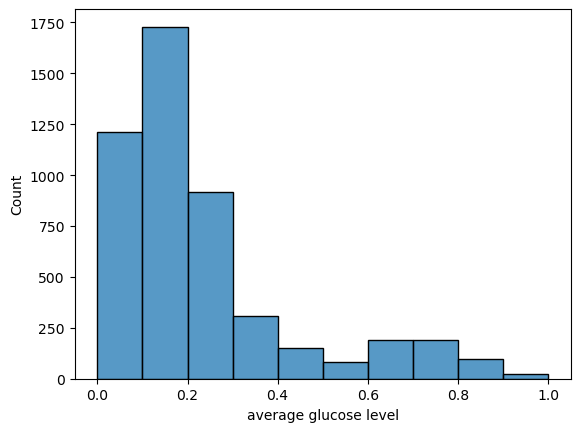

In [8]:
sns.histplot(data=df, x='avg_glucose_level', bins=10)
plt.xlabel("average glucose level")

## 4. age - avg_glucose_level dependency graph

Text(0, 0.5, 'average glucose level')

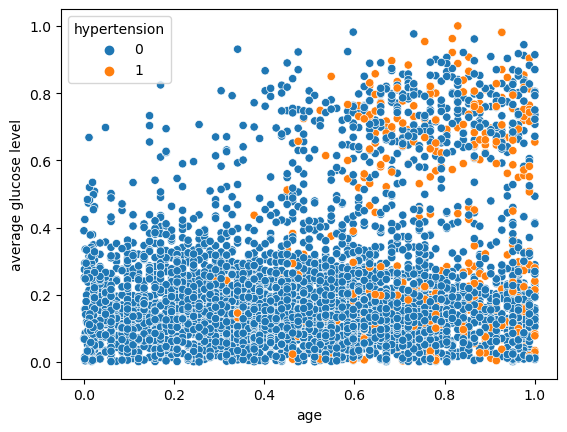

In [9]:
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='hypertension')

plt.ylabel("average glucose level")

## 5. Pearson and Spearman coefficients

In [10]:
pearson_coef, p_value = pearsonr(df['bmi'], df['age'])
print("The Pearson Coefficient is", pearson_coef, " with a p-value of p =", p_value) 

The Pearson Coefficient is 0.33339799516043944  with a p-value of p = 9.515844789882083e-128


In [11]:
spearman_coef, p_value  = spearmanr(df['bmi'], df['age'])
print("The Spearman Coefficient is", spearman_coef, " with a p-value of p =", p_value) 

The Spearman Coefficient is 0.37564955990962323  with a p-value of p = 2.475965580704451e-164


## 6. One Hot Encoding

In [12]:
data = df.select_dtypes(include=[object])

le = preprocessing.LabelEncoder()
df1 = data.astype(str).apply(le.fit_transform)
df1.head()

enc = preprocessing.OneHotEncoder()

enc.fit(df1)

onehotlabels = enc.transform(df1).toarray()

selected_columns = [1, 2, 3, 7, 8]
df2 = df.iloc[:, selected_columns].copy()

df_encoded = pd.concat([df1, df2], axis=1)
df_encoded

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
id,,,,,,,,,,
9046,1,1,2,1,1,0.816895,0,1,0.801265,0.301260
31112,1,1,2,0,2,0.975586,0,1,0.234512,0.254296
60182,0,1,2,1,3,0.597168,0,0,0.536008,0.276060
1665,0,1,3,0,2,0.963379,1,0,0.549349,0.156930
56669,1,1,2,1,1,0.987793,0,0,0.605161,0.214204
...,...,...,...,...,...,...,...,...,...,...
14180,0,0,4,0,0,0.157715,0,0,0.221402,0.095074
44873,0,1,3,1,2,0.987793,0,0,0.323516,0.340206
19723,0,1,3,0,2,0.426270,0,0,0.128658,0.232532


## 7. Visualization of Multi-dimensional Data

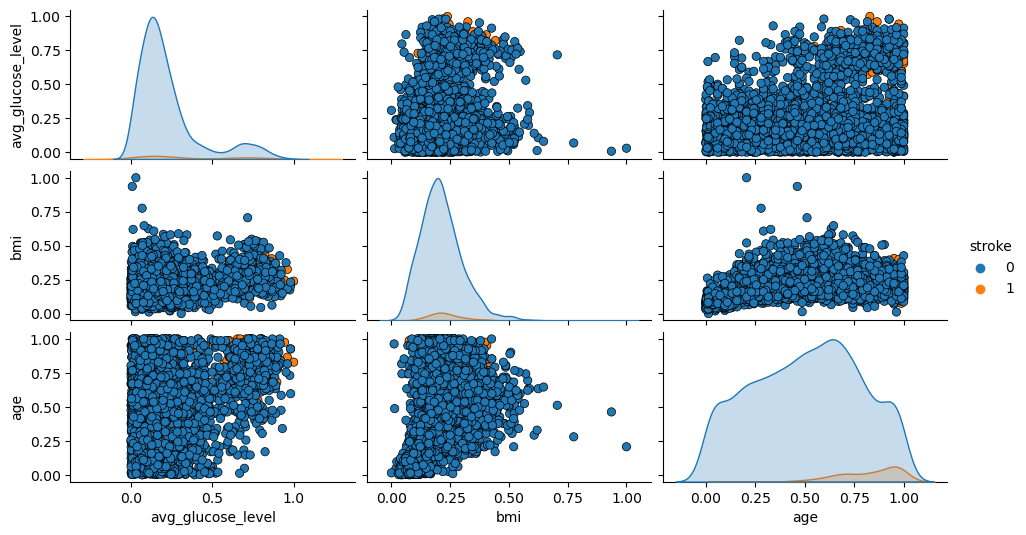

In [13]:
cols = ['avg_glucose_level', "bmi",'age','stroke']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), hue="stroke")

fig = pp.fig 
#fig.subplots_adjust(top=0.93, wspace=0.3)